In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from myTFMlibrary import *
import matplotlib.colors as mcolors
import warnings

In [10]:
# VARIABLES DEF:
path_figures = "path for output figures"
path="path for .csv files previously generated"
DIMMENTIONS = [60]     


nombretabla = "/Connectance_Tabla_MOD_"+str(DIMMENTIONS[0]) #Name of the csv files
print(nombretabla)

try:
    Tabla = pd.read_csv(path+nombretabla+".csv")
    print("\n\n"+nombretabla+".csv exist \n \n")

except Exception:
    print("No existe ", nombretabla)


alphavalue=0.4
save=True
print(path_figures+"Nestedness_Robustness_NODF_"+str(DIMMENTIONS[0])+".pdf")



###################################################################
###################################################################
# AUTOMATIC RANDOM COLOR SELECTION
# COLOURS DOCUMENTATION: https://matplotlib.org/stable/gallery/color/named_colors.html
RANDOM_COLORS = mcolors.CSS4_COLORS
colors = []
for i in range(len(DIMMENTIONS)):
    colors.append(random.choice(list(RANDOM_COLORS.items()))[0])

'''
# MANUAL COLOR SELECTION
colors=['navy','red']
#colors=['dodgerblue','forestgreen']
'''
print("\n \n Representation colors: "+str(colors)+"\n\n")
###################################################################
###################################################################


 
 Representation colors: ['mediumvioletred']


/Connectance_Tabla_MOD_60


/Connectance_Tabla_MOD_60.csv exist 
 

/home/vant/Documentos/TFM/FIGURAS TRABAJO DEFINITIVAS/ConnectanceRobustness/Nestedness_Robustness_NODF_60.pdf


# NODF-Robustness relation

/tmp/ipykernel_30906/4148537651.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla["Predicted_Rob"][Tabla["Predicted_Rob"] > 0.5] = 0.5
/tmp/ipykernel_30906/4148537651.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla["Predicted_Rob_reg"][Tabla["Predicted_Rob_reg"] > 0.5] = 0.5


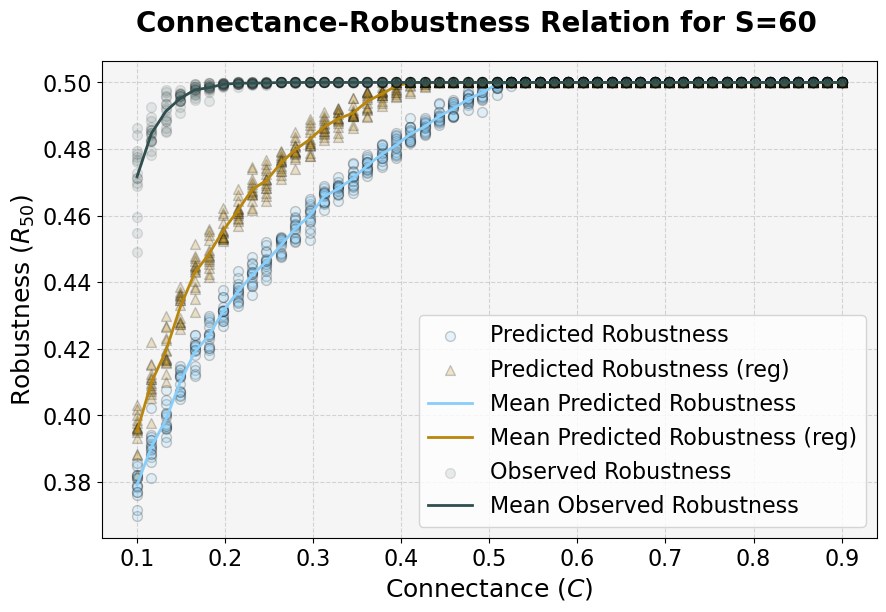

In [11]:
#Let us perfom the mean of the robustness for each connectance
#Filter the data by connectance

mean_Predicted_robustness = Tabla.groupby('C')['Predicted_Rob'].mean()
mean_Observed_robustness = Tabla.groupby('C')['Observed_Rob'].mean()
mean_Predicted_robustness_reg = Tabla.groupby('C')['Predicted_Rob_reg'].mean()
mean_Observed_robustness_reg = Tabla.groupby('C')['Observed_Rob_reg'].mean()

#Change values >0.5 by 0.5
mean_Predicted_robustness[mean_Predicted_robustness > 0.5] = 0.5
mean_Observed_robustness[mean_Observed_robustness > 0.5] = 0.5
mean_Predicted_robustness_reg[mean_Predicted_robustness_reg > 0.5] = 0.5
mean_Observed_robustness_reg[mean_Observed_robustness_reg > 0.5] = 0.5
#Also for Tabla predicted robustness
Tabla["Predicted_Rob"][Tabla["Predicted_Rob"] > 0.5] = 0.5
Tabla["Predicted_Rob_reg"][Tabla["Predicted_Rob_reg"] > 0.5] = 0.5


# Set the default colors
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors[0]="lightskyblue"
default_colors[1]="darkgoldenrod"
default_colors[2]="darkslategray"






fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))

ax1.grid(True, linestyle='--', alpha=0.5,zorder=1)

########################################################################################
# Predicted Robustness
ax1.scatter(Tabla["C"], Tabla["Predicted_Rob"],
            alpha=0.2,
            edgecolors='k',
            color=default_colors[0],
            s=50,
            label="Predicted Robustness",
            zorder=2)
ax1.scatter(Tabla["C"], Tabla["Predicted_Rob_reg"],
            alpha=0.2,
            edgecolors='k',
            color=default_colors[1],
            s=50,
            label="Predicted Robustness (reg)",
            zorder=2, marker="^")
ax1.plot(mean_Predicted_robustness.index, mean_Predicted_robustness.values,
         label="Mean Predicted Robustness",
         zorder=2, color=default_colors[0], linewidth=2)
ax1.plot(mean_Predicted_robustness_reg.index, mean_Predicted_robustness_reg.values,
         label="Mean Predicted Robustness (reg)",
         zorder=2, color=default_colors[1], linewidth=2)

########################################################################################
# Observed Robustness
ax1.scatter(Tabla["C"], Tabla["Observed_Rob"],
            alpha=0.1,
            edgecolors='k',
            s=50,
            label="Observed Robustness",
            zorder=2, color=default_colors[2])
ax1.plot(mean_Observed_robustness.index, mean_Observed_robustness.values,
         label="Mean Observed Robustness",
         zorder=2, color=default_colors[2], linewidth=2)

########################################################################################

ax1.set_xlabel(r"Connectance ($C$)", fontsize=18)
ax1.set_ylabel(r"Robustness ($R_{50}$)", fontsize=18)
ax1.legend(fontsize=16)
#bigger ticks
ax1.tick_params(axis='both', which='major', labelsize=16)

fig1.suptitle("Connectance-Robustness Relation for S=" + str(DIMMENTIONS[0]), fontsize=20, fontweight="bold")
# Set the facecolor of the figure
fig1.patch.set_facecolor('white')
ax1.set_facecolor('whitesmoke')

plt.subplots_adjust(left=0.125, bottom=0.100, right=0.900, top=0.895, wspace=0.200, hspace=0.375)

if save == True:
    plt.savefig(path_figures + "Connectance_Robustness" + "dim" + str(DIMMENTIONS[0]) + ".pdf", dpi=300)
    plt.savefig(path_figures + "png/Connectance_Robustness" + "dim" + str(DIMMENTIONS[0]) + ".png", dpi=300)



# Nestedness-Robustness relation

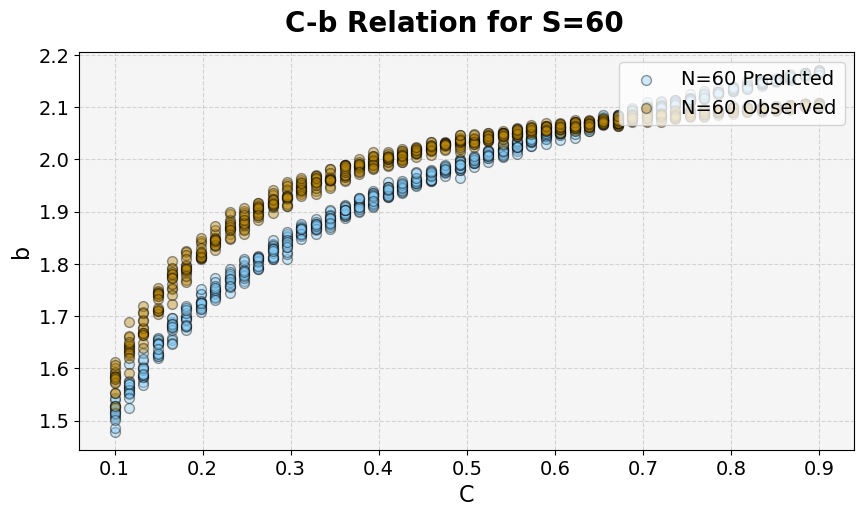

In [12]:
# Delete previous figure
plt.close()





fig3, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.grid(True, linestyle='--', alpha=0.5,zorder=1)
# Set the default colors
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
default_colors[0]="lightskyblue"
default_colors[1]="darkgoldenrod"
default_colors[2]="darkslategray"



########################################################
########################################################
# Figure Module 1

ax1.scatter(Tabla["C"], Tabla["Predicted_b"],
            alpha=alphavalue,
            edgecolors='k',
            color=default_colors[0],
            s=50,
            label="N="+str(DIMMENTIONS[0])+" Predicted",
            zorder=2)

ax1.scatter(Tabla["C"], Tabla["Observed_b"],
            alpha=alphavalue,
            edgecolors='k',
            color=default_colors[1],
            s=50,
            label="N="+str(DIMMENTIONS[0])+" Observed",
            zorder=3)


ax1.set_xlabel("C",fontsize=16)
ax1.set_ylabel("b",fontsize=16)
#biggger ticks
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend()
#upper right legend
ax1.legend(loc='upper right', fontsize=14)

#title
fig3.suptitle("C-b Relation for S="+str(DIMMENTIONS[0]), fontsize=20, fontweight="bold")

# Set the facecolor of the figure
fig3.patch.set_facecolor('white')
ax1.set_facecolor('whitesmoke')


plt.subplots_adjust(left=0.125,
                    bottom=0.100,
                    right=0.900,
                    top=0.895,
                    wspace=0.200,
                    hspace=0.375
                    )

if save==True:
    plt.savefig(path_figures+"C_b/C_b_NODF_"+str(DIMMENTIONS[0])+".pdf")
    plt.savefig(path_figures+"C_b/png/C_b_NODF_"+str(DIMMENTIONS[0])+".png")